In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

##### Data size is 891 rows and 12 columns.

In [6]:
### Checking data type we for each columns.
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### We have int64, float64 and object in data type in our data set.
##### Int64 and float64 as already numeric columns. but object column is string type we have to convert this string type in float.

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### In our dataset Age and Cabin columns content 177 and 687 Null values respectively.
##### Alos Embarked column have 2 null values.

In [18]:
### Checking unqiue class in Pclass.
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [29]:
### Checking count of Male and female in sex column.
data['Sex'].unique()

array(['male', 'female'], dtype=object)

##### We have 3 different classes in Pclass.

In [8]:
### Checking data discription.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Passenger column is Passemnger id.
##### Survivied column only have 2 values 0 and 1, this is our target variable.
##### In Pclass column we have 3 values 1,2, & 3. this are the classes for passenger.
##### In age column we have already check for null values due to which count is less.
##### Parach column shows count of perents/childern aboard the ship.
##### Mean and std difference is looking fine.
##### Quartiles differnce is also ok.

## EDA
#### Univeriate Anaylsis.

Died (0)  => 549
Survived (1) => 342


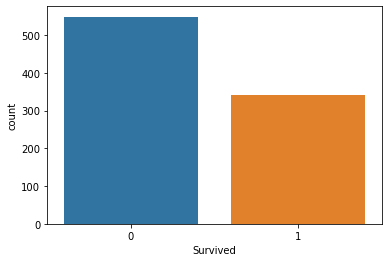

In [9]:
### Ploting count plot to check whether passenger servived or not.
sns.countplot('Survived',data=data)
print('Died (0)  =>',data.Survived.value_counts()[0])
print('Survived (1) =>',data.Survived.value_counts()[1])

##### 549 passengers are died and 342 passengers.

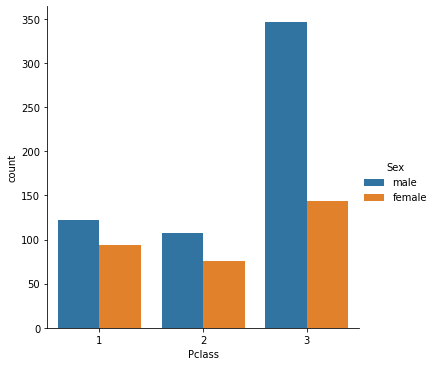

In [10]:
sns.factorplot('Pclass', data=data, kind="count", hue='Sex')

##### Pclass 3 has more number of male as compare to female.

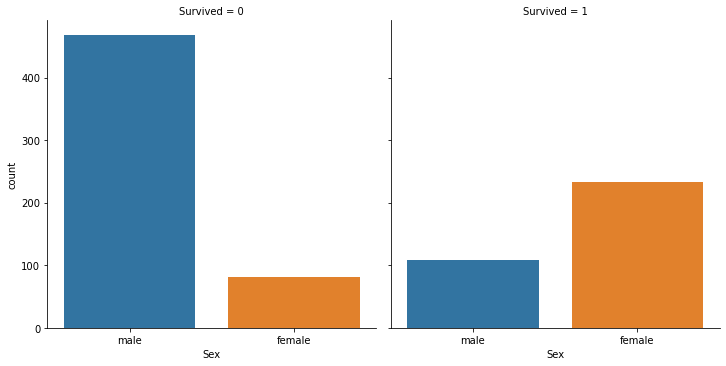

In [11]:
sns.catplot(x='Sex', col='Survived', kind='count', data=data)

Number of passengers in each class: 
 Pclass
1    216
2    184
3    491
dtype: int64

Number of Female and Male in each class: 
 Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64


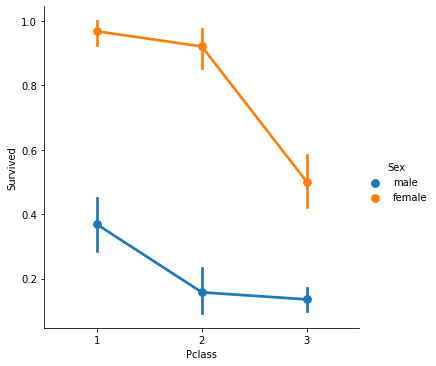

In [12]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='point')
print('Number of passengers in each class: \n',data.groupby(['Pclass']).size())
print('\nNumber of Female and Male in each class: \n',data.groupby(['Sex','Pclass']).size())

<AxesSubplot:xlabel='Survived', ylabel='count'>

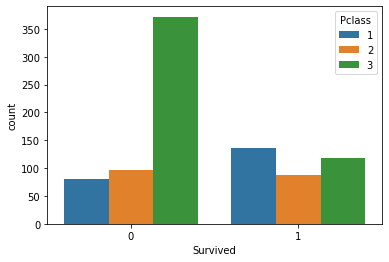

In [15]:
sns.countplot(x='Survived',data=data,hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

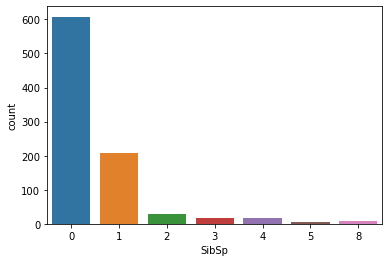

In [17]:
sns.countplot(x='SibSp',data=data)

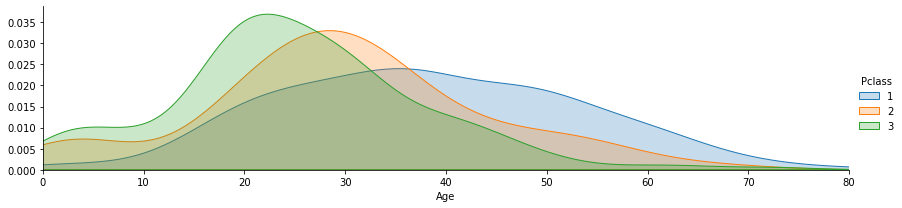

In [19]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(data, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = data['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

#### Biveriate Anaylsis.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

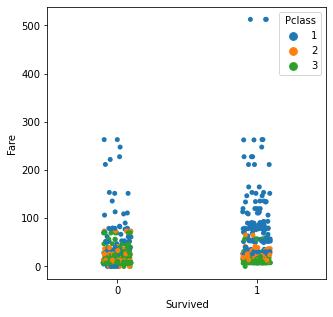

In [24]:
plt.figure(figsize=(5,5))
sns.stripplot(x=data['Survived'],y=data['Fare'],hue=data['Pclass'])

##### P1 class passengers survive count is more then rest of classes.

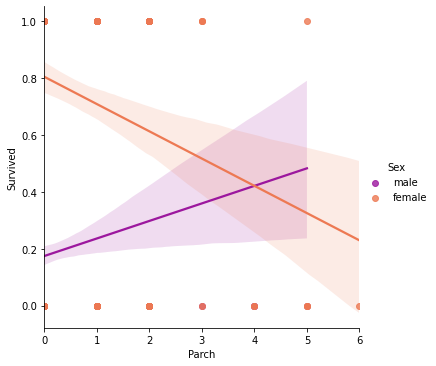

In [25]:
sns.lmplot('Parch','Survived',data=data, hue='Sex',palette='plasma')

### Multiveriate Analysis & Preprocessing

In [77]:
### Importing Label encoder to convert Sex column in numeric.
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
df = l_encoder.fit_transform(data['Sex'])
data['Sex'] = df

##### From above code we have converted Sex string value to numeric where 1 means Male and 0 means Female.

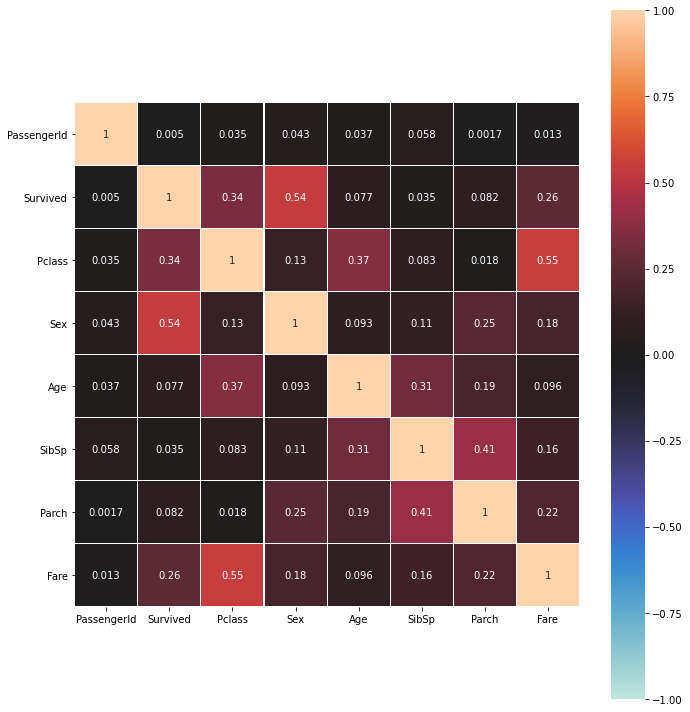

In [41]:
data_corr = data.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0, linewidths=0.1)
plt.tight_layout()

##### We can see There is very less relationship between Parch and Sibsp and age.
##### Plcass and Sex shows some relationship
##### Passenager details does not show any relationship we can drop it.
##### Fare also shows some relationship
#### Droping unwanted columns

In [66]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family'], dtype='object')

In [68]:
data.drop(columns=['PassengerId','Ticket','Cabin','Embarked','Name'], axis=1, inplace= True)

##### We have removed PaseengerID, Ticket, name, Embarked does not show any relationship with our label.
##### Dropiong Cabin because it has more number of NaN, so insisted of fillna, Its better to drop them.

In [78]:
### Let's check our data set now.
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [70]:
### Removing NaN from column Age column
data['Age'] = data['Age'].fillna(value=data['Age'].mean())

In [75]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

##### Now our our datasets has no null values.

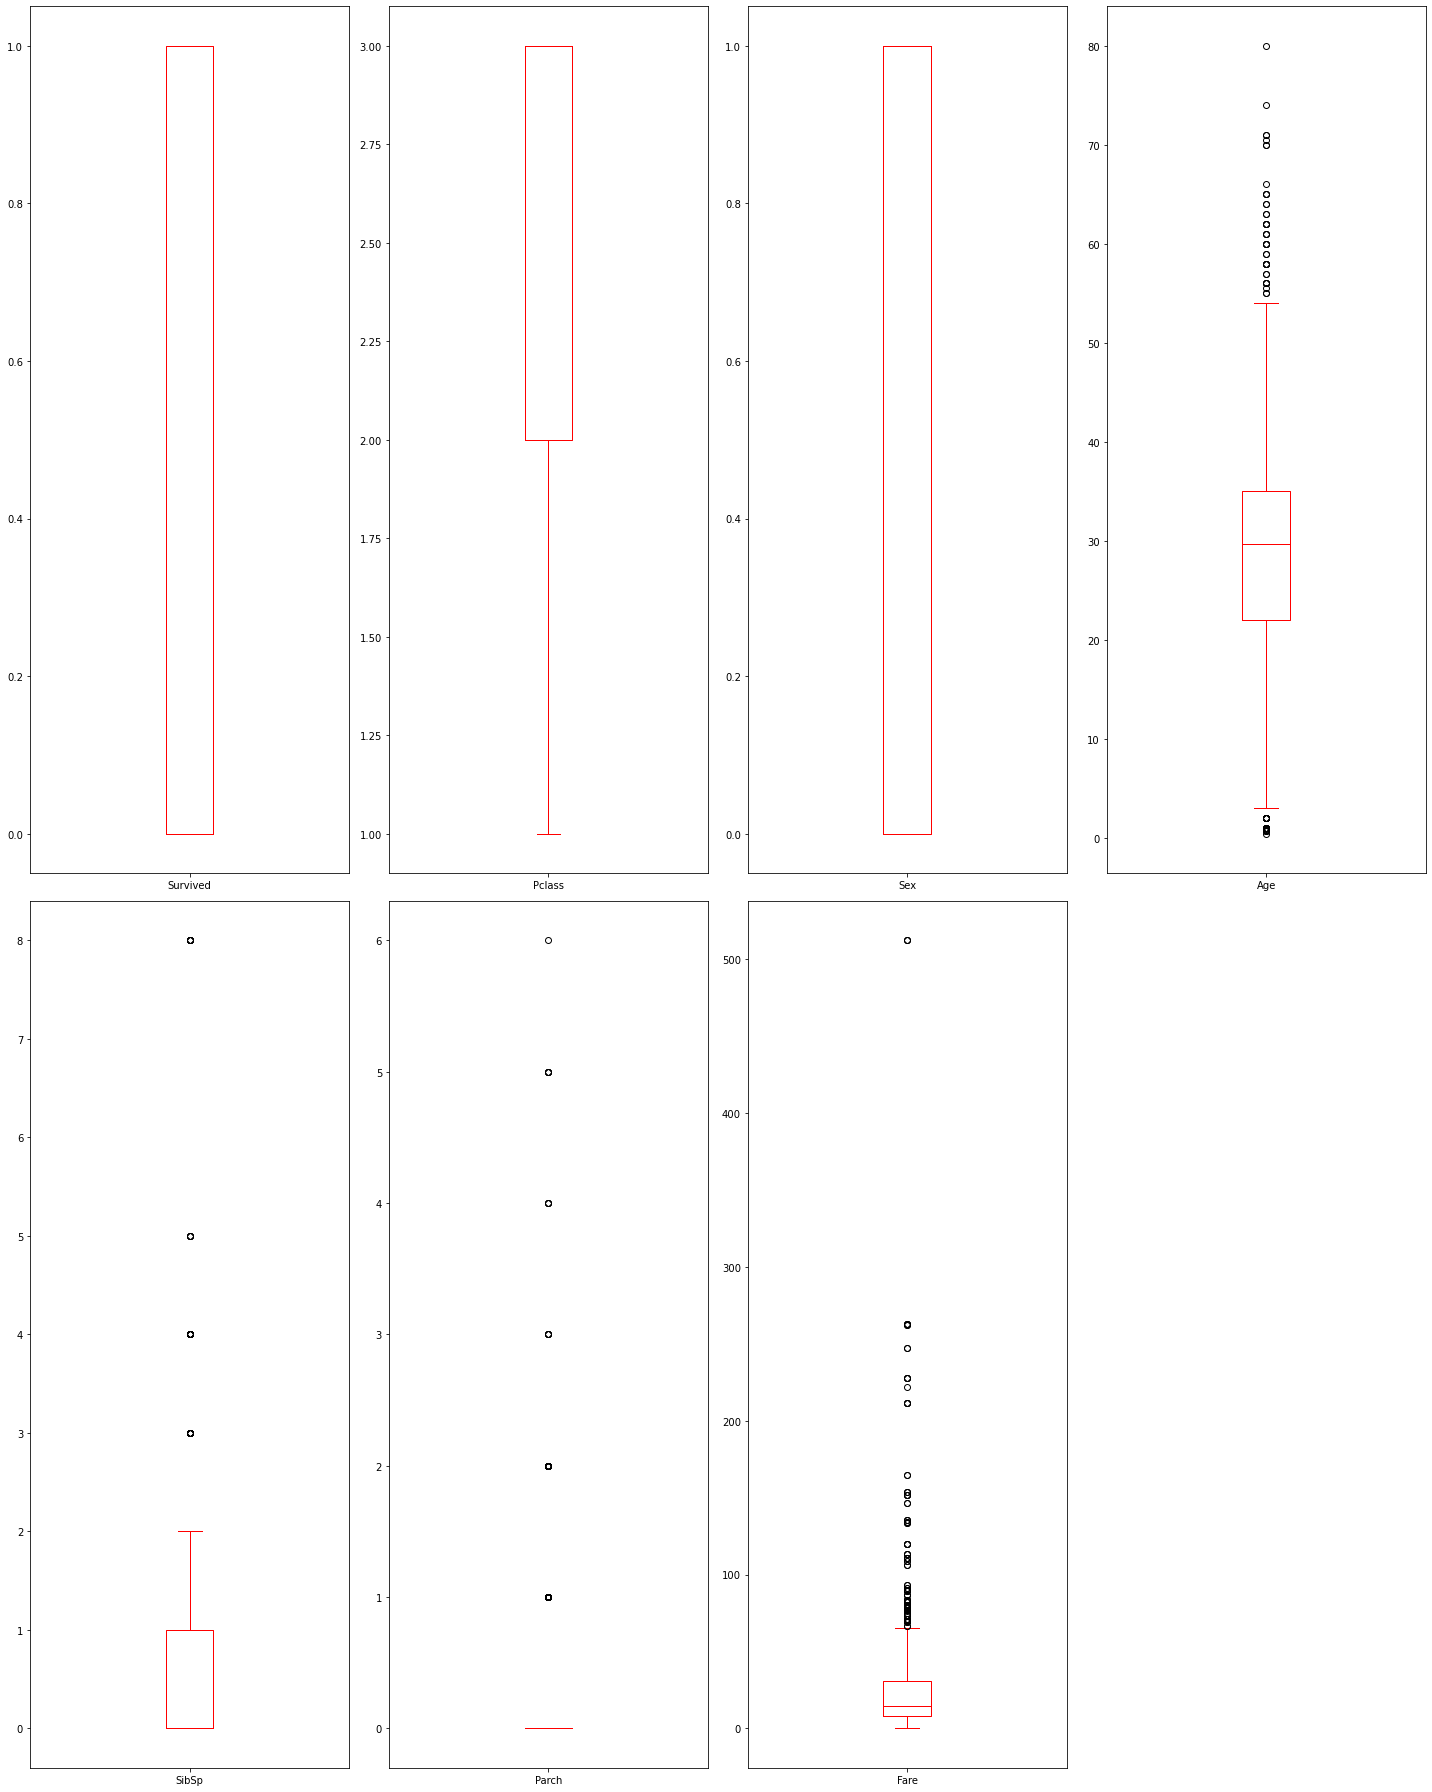

In [81]:
### Ploting Box plot for checking outliers.
plt.figure(figsize= (20,25))
count =1
for column in data:
    if count <=7:
        ax = plt.subplot(2,4,count)
        data[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

#### We have oulters in our dataset Fare has more outliers, Parch also in again we have more outliers.

In [92]:
### Removing outliers from dataset.
from scipy.stats import zscore
z = np.abs(zscore(data))
df = data[(z<3).all(axis = 1)]

In [93]:
print('Data size before z_score: ',data.shape,' Data size after z_score: ',df.shape)

Data size before z_score:  (891, 7)  Data size after z_score:  (820, 7)


In [94]:
data_loss = ((891 - 820)/891)*100
print('Data loss after applying Z_score: ',data_loss)

Data loss after applying Z_score:  7.968574635241302


##### can consider this difference.

In [95]:
### Seperating Features and Label.
x = df.drop(['Survived'],axis=1)
y = df['Survived']

## Scaling (Standardization)

In [98]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

##### Scaled our X data so that our model will not Bais to any of the variable.

## Train - Test Split

In [135]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=54)

In [100]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(615, 6) (615,) (205, 6) (205,)


## Finding best model

In [102]:
## Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
#### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [137]:
confusion_matrix(y_test,y_lr_pred)

array([[128,  19],
       [ 37,  62]], dtype=int64)

In [158]:
accuracy_lr = classification_report(y_test,y_lr_pred)
print(accuracy_lr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       147
           1       0.77      0.63      0.69        99

    accuracy                           0.77       246
   macro avg       0.77      0.75      0.75       246
weighted avg       0.77      0.77      0.77       246



In [141]:
cross_val_score(lr,x,y,cv=5).mean()

0.7902439024390244

In [148]:
#### Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt_pred = dt.predict(x_test)

In [149]:
confusion_matrix(y_test,y_dt_pred)

array([[116,  31],
       [ 37,  62]], dtype=int64)

In [159]:
accuracy_dt = classification_report(y_test,y_dt_pred)
print(accuracy_dt)

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       147
           1       0.67      0.63      0.65        99

    accuracy                           0.72       246
   macro avg       0.71      0.71      0.71       246
weighted avg       0.72      0.72      0.72       246



In [151]:
cross_val_score(dt,x,y,cv=5).mean()

0.7707317073170732

In [152]:
### SVC
svc = SVC()
svc.fit(x_train,y_train)
y_svc_pred = svc.predict(x_test)

In [160]:
accuracy_svc = classification_report(y_test,y_svc_pred)
print(accuracy_svc)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       147
           1       0.85      0.64      0.73        99

    accuracy                           0.81       246
   macro avg       0.82      0.78      0.79       246
weighted avg       0.82      0.81      0.80       246



In [153]:
confusion_matrix(y_test,y_svc_pred)

array([[136,  11],
       [ 36,  63]], dtype=int64)

In [154]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)

In [161]:
accuracy_rf = classification_report(y_test,y_rf_pred)
print(accuracy_rf)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       147
           1       0.80      0.68      0.73        99

    accuracy                           0.80       246
   macro avg       0.80      0.78      0.79       246
weighted avg       0.80      0.80      0.80       246



In [155]:
confusion_matrix(y_test,y_rf_pred)

array([[130,  17],
       [ 32,  67]], dtype=int64)

In [156]:
### K-Neighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_knn_pred = kn.predict(x_test)

In [162]:
accuracy_kn = classification_report(y_test,y_knn_pred)
print(accuracy_kn)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       147
           1       0.78      0.66      0.71        99

    accuracy                           0.79       246
   macro avg       0.79      0.77      0.77       246
weighted avg       0.79      0.79      0.78       246



In [157]:
confusion_matrix(y_test,y_knn_pred)

array([[129,  18],
       [ 34,  65]], dtype=int64)

In [163]:
print('LogisticRegression acc = ',accuracy_lr,'\n CV score = ',cross_val_score(lr,x,y,cv=5).mean(),'\n')
print('DecisionTreeClassifier acc = ',accuracy_dt,'\n CV score = ',cross_val_score(dt,x,y,cv=5).mean(),'\n')
print('SVC  acc = ',accuracy_svc,'\n CV score = ',cross_val_score(svc,x,y,cv=5).mean(),'\n')
print('RandomForestClassifier acc = ',accuracy_rf,'\n CV score = ',cross_val_score(rf,x,y,cv=5).mean(),'\n')
print('KNeighborsClassifier acc = ',accuracy_kn,'\n CV score = ',cross_val_score(kn,x,y,cv=5).mean(),'\n')

LogisticRegression acc =                precision    recall  f1-score   support

           0       0.78      0.87      0.82       147
           1       0.77      0.63      0.69        99

    accuracy                           0.77       246
   macro avg       0.77      0.75      0.75       246
weighted avg       0.77      0.77      0.77       246
 
 CV score =  0.7902439024390244 

DecisionTreeClassifier acc =                precision    recall  f1-score   support

           0       0.76      0.79      0.77       147
           1       0.67      0.63      0.65        99

    accuracy                           0.72       246
   macro avg       0.71      0.71      0.71       246
weighted avg       0.72      0.72      0.72       246
 
 CV score =  0.7646341463414634 

SVC  acc =                precision    recall  f1-score   support

           0       0.79      0.93      0.85       147
           1       0.85      0.64      0.73        99

    accuracy                           0.81 

#### Out of 5 model SVC is our best model, Becuase its given as acc 81% and Cross validatiion score 82%. therefore its our best model.

### Let's PLOT roc_auc curve for our model

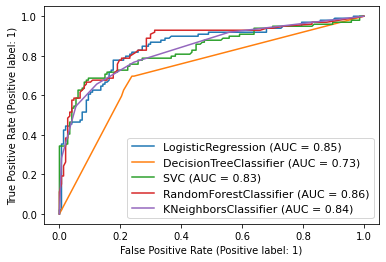

In [164]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_) # Here ax_ means axes with confusion matrix
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11},loc = 'lower right')
plt.show()

## Hyper parameter tuning using GridSearchCV```

In [165]:
from sklearn.model_selection import GridSearchCV


In [172]:
params = {'C':np.arange(0.1,5,0.50),
          'degree':np.arange(1,10,2),
          'gamma':['scale','auto'],
          'coef0':np.arange(0.01,1.0,0.10),
          'decision_function_shape':['ovo','ovr'],
          'random_state':np.arange(40,100,5)}

In [173]:
params

{'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]),
 'degree': array([1, 3, 5, 7, 9]),
 'gamma': ['scale', 'auto'],
 'coef0': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
 'decision_function_shape': ['ovo', 'ovr'],
 'random_state': array([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])}

In [174]:
gridsearch = GridSearchCV(estimator=svc,param_grid=params,cv=5,n_jobs=-1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]),
                         'coef0': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': array([1, 3, 5, 7, 9]),
                         'gamma': ['scale', 'auto'],
                         'random_state': array([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])})

In [175]:
gridsearch.best_params_

{'C': 2.1,
 'coef0': 0.01,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'random_state': 40}

In [177]:
svc = gridsearch.best_estimator_

In [178]:
svc.fit(x_train,y_train)

SVC(C=2.1, coef0=0.01, decision_function_shape='ovo', degree=1, random_state=40)

In [179]:
y_pred = svc.predict(x_test)

In [180]:
confusion_matrix(y_test,y_pred)

array([[137,  10],
       [ 39,  60]], dtype=int64)

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       147
           1       0.86      0.61      0.71        99

    accuracy                           0.80       246
   macro avg       0.82      0.77      0.78       246
weighted avg       0.81      0.80      0.79       246



In [185]:
cross_val_score(svc,x,y,cv=5).mean()

0.8158536585365853

## Saving our model

In [187]:
import pickle
Survival = 'Titanic survival.pickle'
pickle.dump(svc,open(Survival,'wb'))

In [188]:
loaded_model = pickle.load(open(Survival,'rb'))

In [189]:
test = loaded_model.predict(x_test)

In [190]:
confusion_matrix(y_test,test)

array([[137,  10],
       [ 39,  60]], dtype=int64)